学习领域

> Listを使ったほうがいい場合
これまで見てきた特長から、頻繁に要素の入れ替えが起こったり、要素の追加や削除が行われたりする場合には、Listが適していると言えます。また、要素数が特定できないような時にもListを利用すると柔軟に対応できるかもしれません。

> 配列を使ったほうがいい場合
配列が適しているのは、最初の時点で要素数が確定している場合や、何度もランダムな要素にアクセスするような場合です。要素の入れ替えが多かったり、あとから追加する必要が出てくるような場合には避けたほうがいいでしょう。

> http://www.woshipm.com/pmd/448244.html 如何成为一名AI产品经理

> 评价指标 https://blog.csdn.net/qq_34374664/article/details/80358916

资料库

> https://medium.com/@br19920702/%E4%B8%AD%E7%A0%94%E9%99%A2%E9%96%8B%E6%BA%90nlp%E5%A5%97%E4%BB%B6-ckiptagger-%E7%B9%81%E4%B8%AD%E4%B8%8D%E7%B5%90%E5%B7%B4-7822fc4efbf 台语NER

https://www.cnblogs.com/wsine/p/5180769.html 视频学习一下K-means算法

https://zhuanlan.zhihu.com/p/75477709

### k-means 方法1

In [9]:
# -*- coding: utf-8 -*-
"""
Copyright:NULL
Author: Luan Bo
Date:2020-12-09
Description: 
"""
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
def euclDistance(p1, p2):
    """
    Input argv:--
    Output argv:--
    Return: Euclidean distance
    Function Description: Calculate the Euclidean distance between two vectors.
    """
    return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [18]:
def means(arr):
    """
    Input argv: data set, number of clusters
    Output argv: --
    Return: mean value
    Function Description: Calculate mean
    """
    return np.array([np.mean([p[0] for p in arr]),np.mean([p[1] for p in arr])])

In [21]:
def generateData(list1):
    """
    Input argv: list of x,y set
    Output argv: list of x,y set
    Return: an array of Data Set
    Function Description: Generate Data Set from lris_df dataset
    """
    lst = []
    lris_df = datasets.load_iris()
    x_axis = lris_df.data[:,0]
    y_axis = lris_df.data[:,2]
    for i in range(len(x_axis)):
        lst.append(float(x_axis[i]))
        lst.append(float(y_axis[i]))
        list1.append(lst)
        lst=[]
    arr=np.array(list1)
    print(arr)
    return arr

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.4]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

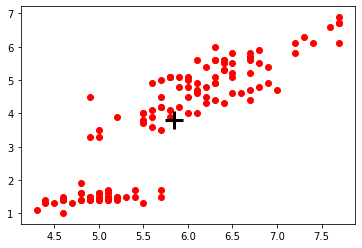

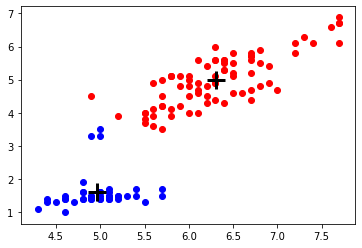

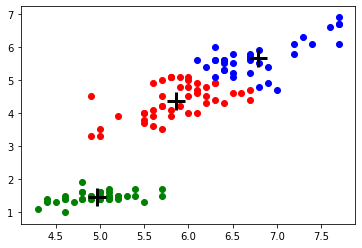

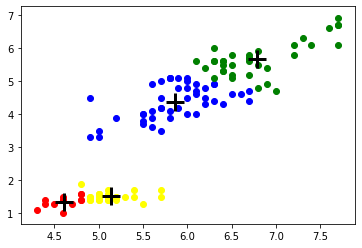

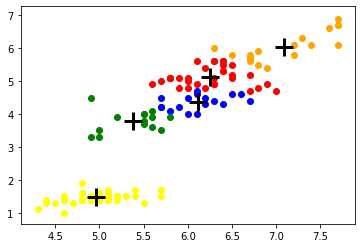

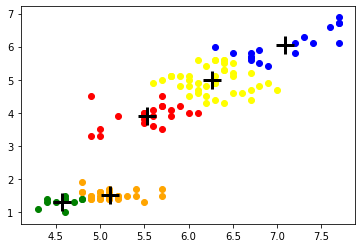

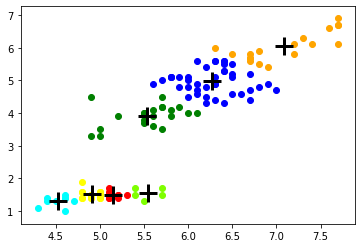

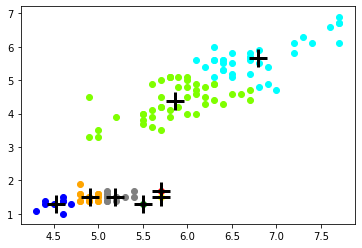

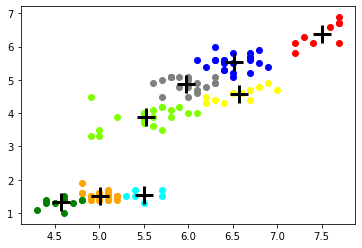

In [25]:
list1 = []
arr = generateData(list1)

# Divides train set and test set by 8:2
X_train, X_test = train_test_split(arr,test_size=0.2,random_state=1)

count=10  # Number of k
SSE_train=[]  # Train SSE
SSE_test=[]    # Test SSE
n=20      # Maximum number of iterations

for k in range(1,count):
    cla_arr=[]    # Clustering
    centroid=[]   # Centroids
    for i in range(k):
        j=np.random.randint(0,len(X_train))
        centroid.append(list1[j])
        cla_arr.append([])
    centroids=np.array(centroid)    
    cla_tmp=cla_arr
    cla_tmp1=cla_arr
    
    # iteration
    for i in range(n):
        # Cluster analysis of the points in the train set
        for e in X_train:
            pi=0
            min_d=euclDistance(e,centroids[pi])   
            for j in range(k):
                if(euclDistance(e,centroids[j])<min_d):  
                    min_d=euclDistance(e,centroids[j])
                    pi=j
            cla_tmp[pi].append(e)
        
        for m in range(k):
            if(n-1==i):
                break
            centroids[m]=means(cla_tmp[m])  # Iterative Updating of Centroids
            cla_tmp[m]=[]

    # Calculating SSE for train set
    dis=0
    for i in range(k):
        for j in range(len(cla_tmp[i])):
            dis+=euclDistance(centroids[i],cla_tmp[i][j])
    SSE_train.append(dis)
    
    # Process Validation
    col = ['red','blue','green','yellow','orange','Aqua','Chartreuse','grey','HotPink']
    for i in range(k):
        plt.scatter([e[0] for e in cla_tmp[i]],[e[1] for e in cla_tmp[i]],color=col[i])
        plt.scatter(centroids[i][0],centroids[i][1],linewidth=3,s=300,marker='+',color='black')
    plt.show()
    
    
    # Cluster analysis of the test set with the centroids of the train set.
    for e in X_test:
        ki=0
        min_d=euclDistance(e,centroids[ki])
        for j in range(k):
            if(euclDistance(e,centroids[j])<min_d):
                min_d=euclDistance(e,centroids[j])
                ki=j
        cla_tmp1[ki].append(e)
    
    # Calculating SSE for test set
    dis=0
    for i in range(k):
        for j in range(len(cla_tmp1[i])):
            dis+=euclDistance(centroids[i],cla_tmp1[i][j])
    SSE_test.append(dis)
    
    
    

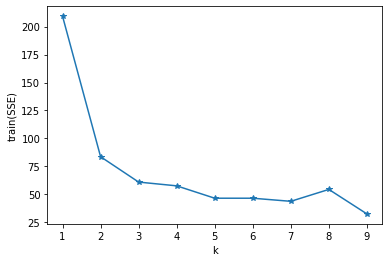

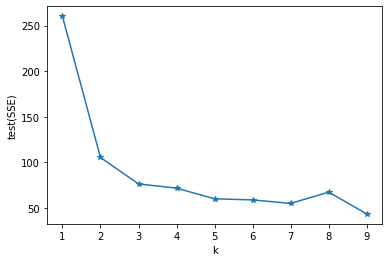

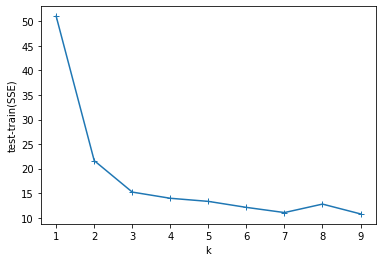

In [26]:
# Calculate the difference between the test set and the train set SSE.
SSE=[]
for i in range(len(SSE_test)):
    SSE.append(SSE_test[i]-SSE_train[i])

# train (SSE)
x=range(1,count)
plt.figure()
plt.plot(x,SSE_train,marker='*')
plt.ylabel("train(SSE)")
plt.xlabel("k")
plt.show()

# test (SSE)
plt.figure()
plt.plot(x,SSE_test,marker='*')
plt.ylabel("test(SSE)")
plt.xlabel("k")
plt.show()

# test-train(SSE)
plt.figure()
plt.plot(x,SSE,marker='+')
plt.ylabel("test-train(SSE)")
plt.xlabel("k")
plt.show()

### k-means 方法2

https://blog.csdn.net/u010916338/article/details/86487890

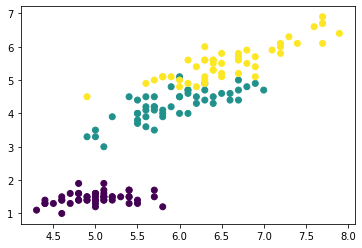

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
 
# Load DataSet (Dict type)
lris_df = datasets.load_iris()

# Pick the first two dimensions as the x- and y-axes.
x_axis = lris_df.data[:,0]
y_axis = lris_df.data[:,2]

plt.scatter(x_axis, y_axis, c=lris_df.target)
plt.show()

### 英文分词

https://blog.csdn.net/aieraisiji/article/details/88397865

In [ ]:
# -*- coding: utf-8 -*-
"""
Copyright:NULL
Author: Luan Bo
Date:2020-12-09
Description: Frequency statistics for English words
"""


def iptext():
    """
    Input argv:--
    Output argv:--
    Return:the text column with all information
    Function Description: Provide functions Read the input file, use lower() and replace() functions 
                to unify all words to lowercase, and replace special characters with spaces.
    """
    
    text = open('eng_sample.txt', 'r', encoding='utf8').read()
    with open('eng_sample.txt', 'r', encoding='utf8') as f:
        text = f.read()
    text = text.lower()
    for rr in '!"#$&()*+,-./:;<=>?@[\\]^_{|}·~‘’':
        text = text.replace(rr,"")
    return text

In [ ]:
# Store the processed text in dictionary with word frequency statistics.
text = iptext()
words = text.split()
cnt = {}
for word in words:
    cnt[word] = cnt.get(word,0) + 1

# The statistical results are saved as a list, sorted by word frequency, and the top thirty are output.
op_num = 30
itemlst = list(cnt.items())
itemlst.sort(key=lambda x:x[1],reverse=True)
for i in range(op_num):
    word,cnt = itemlst[i]
    print(word,cnt)

https://blog.csdn.net/Thanksbao/article/details/80083170

In [ ]:
import re

text = '我的生日是2000-1-12 14:34，他的生日是1999-12-1，你的生日是2010-12-25。'
res = re.findall(r"(\d{4}-\d{1,2}-\d{1,2})",text)
for item in res:
    print(item)

https://www.runoob.com/mongodb/nosql.html 

https://host.zzidc.com/shujuku/423.html

No-SQL:
> NoSQL, which refers to a non-relational database, is sometimes referred to as an acronym for Not Only SQL, a general term for a database management system that differs from a traditional relational database.
NoSQL is used for storing very large amounts of data. (For example, Google or Facebook). These types of data stores do not require a fixed schema and can be scaled horizontally without redundant operations.
> 
> Atomicity, Consistency, Isolation, Durability.

Database Management System
> SQL: MySQL, Oracle Database, Microsoft SQL Server
> 
> NoSQL: MongoDB, Redis

In [ ]:
! pip install MySQL-python
! pip install redis # ~Python 3.5.x
! pip install pymongo

In [ ]:
# MySQL Connector
import mysql.connector
con = mysql.connector.connect(host='localhost', port='xxxx', user='root', password='xxxxxxx', database ="demo_xxx")

# Redis
import redis
r = redis.Redis(host='localhost', port='xxxx', password='xxxxxxx', db=0)

# MongoDB
from pymongo import MongoClient
client = MongoClient(host='localhost', port='xxxx')
client.admin.autthenticate('admin', 'xxxxxxx')

https://blog.csdn.net/zhp_chen/article/details/78841031
学一下中位数的计算

The central location of the data is the easiest feature of the data. By virtue of centrality, we can know an average of the data, and if we want to make predictions about new data, then the average is a very intuitive choice. The central position of the data can be classified as `Mean`, `Median`, or `Mode`. The `Mean` and `Median` are used for quantitative data, while the `Mode` is used for qualitative data.

　　For quantitative Data, the `Mean` is the sum divided by the total (N), and the `Median` is the value in the middle of the numerical range (parity totals are treated differently).

<img src="a.png" width="20%">

<img src="b1.png" width="40%">

<img src="b2.png" width="60%">

In [ ]:
from numpy import mean, median
from numpy.random import normal

# Generate a dataset
data = normal(0, 10, size=10)
print(data)

# Mean
print('mean: ', mean(data))

# Median
print('median: ', median(data))

For qualitative data, the `Mod` is the most frequently occurring value. Using `Scipy`.

In [ ]:
from scipy.stats import mode

data = [1, 2, 3, 2, 2, 2, 6]
print(data)

# Mod
print(mode(data))
print('mod: ', mode(data).mode[0])

Variance
> Variance is the mean of the square of the difference between the individual data and the mean. In probability theory and mathematical statistics, variance is a measure of the degree of deviation between a random variable and its mathematical expectation. In many problems, it is important to study the degree of deviation between a random variable and its mean.

Standard Deviation
> The root sign of the variance.

<img src="c.png" width="60%">

In [ ]:
num_lst=[111,125,318,29,208,171]
b=0
sum_a=0
pj=sum(num_lst)/len(num_lst);

for a in range(len(num_lst)):
   b=(num_lst[a]-pj)**2
   sum_a = b+sum_a
print("Standard Deviation：",(sum_a/len(num_lst))**0.5)

https://blog.csdn.net/ztf312/article/details/100559299

In [27]:
import numpy as np
import array

totl = True
arr = array.array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(arr)
if totl == True:
    print(np.std(arr, ddof = 0))
else:
    print(np.std(arr, ddof = 1))

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
2.8722813232690143


In [30]:
! pip install nltk

In [46]:
# -*- coding: utf-8 -*-
"""
Copyright:NULL
Author: Luan Bo
Date:2020-12-10
Description: 
"""


from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier


def pret_text(text):
    # word token
    words = nltk.word_tokenize(text)
    # Lemmatization
    # wordnet_lematizer = WordNetLemmatizer()  
    # words = [wordnet_lematizer.lemmatize(word) for word in words]
    # Del stopword
    # remain_words = [word for word in words if word not 
    #                in stopwords.words('english')]
    remain_words = [word for word in words]
    
    # True 表示该词在文本中
    return {word: True for word in remain_words}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\b-luan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\b-luan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\b-luan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Setp 1: 
lst_T = []
lst_L = []
with open('data.txt', 'r', encoding='utf8') as f:
    store = f.readlines()

for line in store:
    # lst_T.append(pret_text(str(line.split('\t')[0])))
    lst_T.append(str(line.split('\t')[0]))
    lst_L.append(int(line.split('\t')[1].split('\n')[0]))
print(lst_T[:10])
print(lst_L[:10])


['one of the responses those that enjoy " detroit rock city " ( probably kiss fans , mostly ) might have upon first glance at the rating i\'ve given the film might be something like : " oh , that casey\'s gone and become a jaded critic on us . ', 'just what did he expect out of a dumb teenage rock n\' roll movie like this ? " ', "i'm wondering the same thing . ", 'i feel like i should have had a grand time with " detroit rock city . " ', "it's the sort of movie i wish i could've had a lot of fun with , but i didn't . ", "i just didn't . ", "surely this film isn't trying to win any major awards , so should i have expected an oscar-caliber film ? ", 'no , but i expected something . ', 'a funny joke . ', 'a clever prank . ']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [48]:
text_test, text_rest, label_test, label_rest = train_test_split(lst_T, lst_L, test_size=0.8, random_state=1)
text_train, text_dev, label_train, label_dev = train_test_split(text_rest, label_rest, test_size=0.125, random_state=1)
print(text_train[:10])
# print(text_dev[:10])
# print(label_dev[:10])

with open('test_data.txt', 'w+', encoding='utf8') as f:
    for i in range(len(text_test)):
        op = ''.join([str(text_test[i]), '\t', str(label_test[i]), '\n'])
        f.write(op)



[' " fail-safe " clearly sees it as one of the central issues of the cold war , and , likewise , it becomes a central theme in the film . ', 'i would never call myself a " star wars " fan - especially not considering what it means to be a fanatic these days - but i\'ve always enjoyed the films along with everyone else in america . ', ' ( frankly i have no idea on these points . ) ', 'among these are leo biederman ( elijah wood ) and sarah hotchner ( leelee sobieski ) . ', "of course , the general reaction of the audience was oppposed to mine , and so i am in the minority , as i was when i stood on the side of dante's peak . ", "well , it's not . ", 'but the comet is a huge mistake , making it more laughable than frightening . ', 'he races off to mail the information , but is killed in a reckless car accident . ', 'deep impact is rated pg-13 for disaster related elements and brief language . ', 'hart bochner ( die hard ) is particularly fun as kara\'s love interest , a lovesick landscap

In [49]:
train_data_m = []
for i in range(len(text_train)):
    train_data_m.append([pret_text(text_train[i]),label_train[i]])
print(train_data_m[:10])

dev_data_m = []
for i in range(len(text_dev)):
    dev_data_m.append([pret_text(text_dev[i]),label_dev[i]])
# print(dev_data_m[:10])

train_data_f = train_data_m + dev_data_m
print(train_data_f[:5])
print(train_data_f[-5:])

[[{'``': True, 'fail-safe': True, 'clearly': True, 'sees': True, 'it': True, 'as': True, 'one': True, 'of': True, 'the': True, 'central': True, 'issues': True, 'cold': True, 'war': True, ',': True, 'and': True, 'likewise': True, 'becomes': True, 'a': True, 'theme': True, 'in': True, 'film': True, '.': True}, 1], [{'i': True, 'would': True, 'never': True, 'call': True, 'myself': True, 'a': True, '``': True, 'star': True, 'wars': True, 'fan': True, '-': True, 'especially': True, 'not': True, 'considering': True, 'what': True, 'it': True, 'means': True, 'to': True, 'be': True, 'fanatic': True, 'these': True, 'days': True, 'but': True, "'ve": True, 'always': True, 'enjoyed': True, 'the': True, 'films': True, 'along': True, 'with': True, 'everyone': True, 'else': True, 'in': True, 'america': True, '.': True}, 1], [{'(': True, 'frankly': True, 'i': True, 'have': True, 'no': True, 'idea': True, 'on': True, 'these': True, 'points': True, '.': True, ')': True}, 1], [{'among': True, 'these': Tru

In [50]:
demo_model = NaiveBayesClassifier.train(train_data_f)

In [51]:
# test_text1 = 'I like this movie very much'
# test_text2 = 'we have the story of a dying man earl partridge ( jason robards ) wanting to get in touch with his son and make amends .'

hy_label = []
for item in text_test:
    hy_label.append(int(demo_model.classify(pret_text(item))))
print(hy_label)

[0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]


In [52]:
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import f1_score         #调和平均值F1


print('Accuracy :',accuracy_score(label_test, hy_label))
print('Precision:',precision_score(label_test,hy_label))
print('F1       :',f1_score(label_test,hy_label))

Accuracy : 0.8055555555555556
Precision: 0.75
F1       : 0.8108108108108107



|   | Lemmatization ON & Stopword Del ON | Lemmatization OFF & Stopword Del ON | Lemmatization ON & Stopword Del OFF | Lemmatization OFF & Stopword Del OFF |
| :--- | :----: | ----: | ----: | ----: |
| Accuracy | 0.7870370370370371 | 0.7870370370370371 | 0.7777777777777778 | 0.8055555555555556 |
| Precision| 0.71875      | 0.7258064516129032     | 0.7142857142857143 | 0.75 |
| F1 | 0.8     | 0.7964601769911503    | 0.7894736842105262 | 0.8108108108108107 |

In [12]:
while True:
    ip_text = input("Comments('qqq' to exit):")
    if ip_text == 'qqq':
        break
    else:
        if 'like' in ip_text or 'love' in ip_text:
            print("Postive")
        else:
            hy_res = demo_model.classify(pret_text(ip_text))
            if hy_res == 1:
                print("Postive")
            elif hy_res == 0:
                print("Negative")
            else:
                print("Error: Please enter a sentence in English...")
                continue
print("Goodbye!")

Comments('qqq' to exit):I like this movie
Postive
Comments('qqq' to exit):I love this gay
Postive
Comments('qqq' to exit):qqq
Goodbye!
